# Train and test your FCNN and CNN by the Fashion dataset. Discuss your results by comparing performance between two types of networks

### Import Necessary Modules

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

###  Build a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [2]:
def build_fcnn():
    inputs = Input(shape=(28, 28, 1), name='InputLayer')
    
    x = Flatten()(inputs)
    x = Dense(512, activation = 'relu')(x)

    outputs = Dense(10, activation = 'softmax', name='OutputLayer')(x)

    model = Model(inputs, outputs, name = 'Ten-Class-Classifier-FCNN')

    model.summary()

    return model

In [3]:
fcnn_model = build_fcnn()

Model: "Ten-Class-Classifier-FCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Load MNIST Fashion dataset

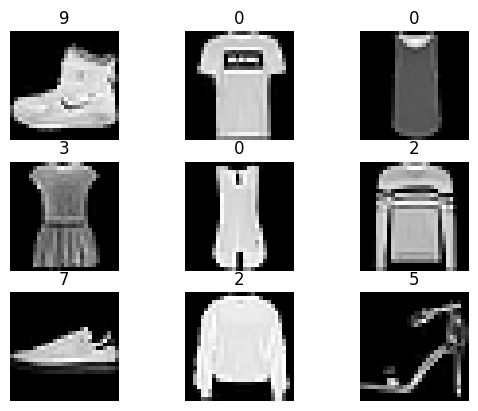

In [4]:
# Function to Display Loaded Data

def display_imgage(image_set, title_set):
    n = len(title_set)

    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image_set[i], cmap='gray')
        plt.title(title_set[i])
        plt.axis('off')
    plt.show()
    plt.close()



# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Display some loaded data
display_imgage(x_train[:9], y_train[:9])


### Prepare Dataset

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Training and Evaluation FCNN by the Fashion dataset

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7763 - loss: 0.6357 - val_accuracy: 0.8512 - val_loss: 0.4137
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8613 - loss: 0.3833 - val_accuracy: 0.8702 - val_loss: 0.3588
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8768 - loss: 0.3341 - val_accuracy: 0.8714 - val_loss: 0.3449
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8864 - loss: 0.3108 - val_accuracy: 0.8802 - val_loss: 0.3299
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8927 - loss: 0.2901 - val_accuracy: 0.8852 - val_loss: 0.3269
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8982 - loss: 0.2716 - val_accuracy: 0.8842 - val_loss: 0.3195
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9038 - loss: 0.2564 - val_accuracy: 0.8841 - val_loss: 0.3167
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9088 - loss: 0.2442 - val_accuracy: 0.

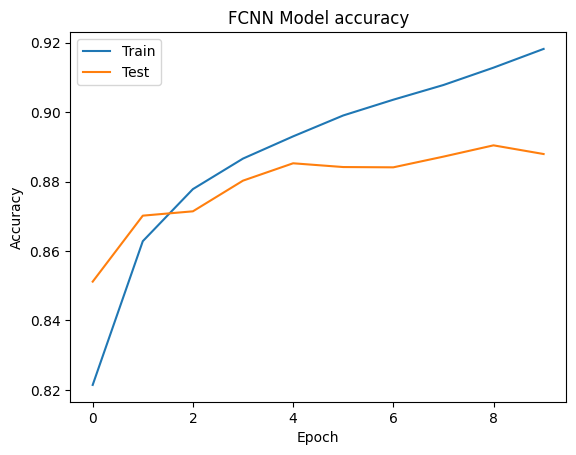

In [6]:
# Compile the model
fcnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
fcnn_model_history = fcnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
fcnn_test_loss, fcnn_test_acc = fcnn_model.evaluate(x_test, y_test)

# Predict on the test set
fcnn_predictions = fcnn_model.predict(x_test)

print('Original        Predicted')
print('========        =========')

for i in range(10):
    print(np.argmax(y_test[i]), '        ', np.argmax(fcnn_predictions[i]))


# Plot training & validation accuracy values
plt.plot(fcnn_model_history.history['accuracy'])
plt.plot(fcnn_model_history.history['val_accuracy'])
plt.title('FCNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.close()

###  Build a convolutional neural network (CNN) for classifying 10 classes of images.

In [7]:
def build_cnn():
    inputs = Input((28, 28, 1), name = 'InputLayer')

    x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation = 'relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation = 'relu')(x)
    #x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)

    x = Dense(512, activation = 'relu')(x)

    outputs = Dense(10, activation = 'softmax', name='OutputLayer')(x)

    model = Model(inputs, outputs, name = 'Ten-Class-Classifier-CNN')

    model.summary()

    return model

In [8]:
cnn_model = build_cnn()

Model: "Ten-Class-Classifier-CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

### Training and Evaluation CNN by the Fashion dataset

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7381 - loss: 0.7195 - val_accuracy: 0.8644 - val_loss: 0.3663
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8747 - loss: 0.3390 - val_accuracy: 0.8825 - val_loss: 0.3184
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8962 - loss: 0.2776 - val_accuracy: 0.8996 - val_loss: 0.2711
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9128 - loss: 0.2317 - val_accuracy: 0.8938 - val_loss: 0.2782
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9229 - loss: 0.2077 - val_accuracy: 0.9053 - val_loss: 0.2573
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9315 - loss: 0.1822 - val_accuracy: 0.9081 - val_loss: 0.2683
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9387 - loss: 0.1642 - val_accuracy: 0.9021 - val_loss: 0.2750
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9459 - loss: 0.1450 - val_accu

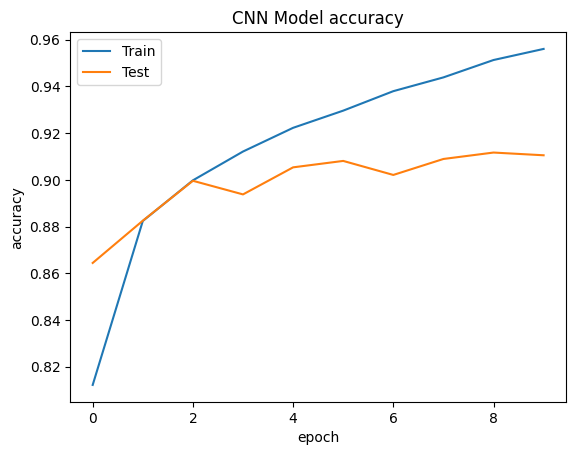

In [9]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)

# Predict on the test set
cnn_predictions = cnn_model.predict(x_test)

print('Original        Predicted')
print('========        =========')

for i in range(10):
    print(np.argmax(y_test[i]), '        ', np.argmax(cnn_predictions[i]))


# Plot training & validation accuracy values
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.close()

### FCNN vs CNN performance comparison

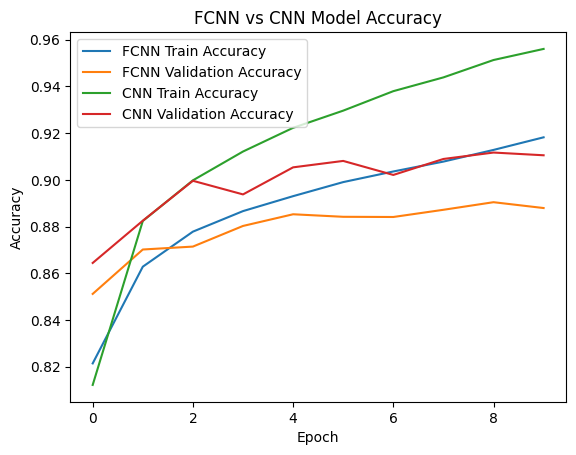

In [10]:
# Plot both FCNN and CNN accuracy values
plt.plot(fcnn_model_history.history['accuracy'], label='FCNN Train Accuracy')
plt.plot(fcnn_model_history.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.plot(cnn_model_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_model_history.history['val_accuracy'], label='CNN Validation Accuracy')

# Add title and labels
plt.title('FCNN vs CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add legend
plt.legend(loc='upper left')

# Display the plot
plt.show()
plt.close()

### Note

### Understanding to_categorical in Neural Networks

The function to_categorical() performs one-hot encoding on your categorical data.

What is One-Hot Encoding?
One-hot encoding converts categorical data (like class labels) into a binary vector representation where:

    - Each position in the vector represents a specific category
    - Only one position has a value of 1 (the "hot" position)
    - All other positions have values of 0

Breaking Down the Example
pythony_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
In this code:

y_train and y_test originally contain integer labels (like 0, 1, 2, ..., 9)
10 represents the number of possible categories (classes)
The result is a 2D array where each row is a one-hot encoded vector

Example Transformation
If your original data looks like:
y_train = [3, 7, 0, 9, 2, ...]
After applying to_categorical(y_train, 10), it becomes:
y_train = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 3
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # 7
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 0
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # 9
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # 2
    ...
]

Why Use One-Hot Encoding?
There are several important reasons to use one-hot encoding:

Categorical Representation: Neural networks cannot directly interpret categorical data like "cat", "dog", or even integer labels.
No Ordinal Relationship: One-hot encoding prevents the model from incorrectly inferring an ordinal relationship between categories. For example, if you have classes 0, 1, 2, 3, the model might incorrectly assume that class 3 is "more similar" to class 2 than to class 0.
Output Layer Compatibility: In multi-class classification problems, using a softmax activation function in the output layer requires one-hot encoded targets.
Loss Function Requirements: Common loss functions for classification (like categorical crossentropy) expect one-hot encoded labels.

When to Use to_categorical
You typically use to_categorical when:

You're working on a multi-class classification problem
Your model has a softmax output layer
You're using categorical crossentropy loss function

If you're working with binary classification, you can use simple 0/1 labels instead.